In [1]:
#We are testing a DL model for Mixed integer formulation for Water distribution network.
# The input data such as water demand and time-ahead dynamic energy prices are obtained from Singh et al (2019) paper.
# We computed the time ahead pump switching using MATALB Gurobi solver
# We obtained the time ahead pump switching for 2048 hours (85.33 days)
# We train_test the neural network in the ratio of 80-20.
# The nn is trained using ReLu and SoftMax (as the output is integer values)

#In our  case y is (z)

import numpy as np
import pandas as pd   #data analysis and manipulation library
import seaborn as sns #Python statistical data visualization library.
import matplotlib.pyplot as plt
from sklearn import model_selection #Tuning the hyperparameters, cross validation, model persistance are the important aspects of this.
from sklearn.model_selection import train_test_split #ML library to data analysis
from sklearn.metrics import accuracy_score, r2_score
import sklearn.metrics as metrics
from openpyxl import Workbook, load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows


from sklearn.decomposition import PCA #dimensionality reduction

%matplotlib inline

#Libraries for Deep learning framework from Keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import BatchNormalization

import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential

from tensorflow.keras import layers
from tensorflow.keras import utils as np_utils
from tensorflow.keras import models 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, LeakyReLU, PReLU, ELU #Import activation functions from keras.layers
from tensorflow.keras.layers import Dropout #Import dropout library, the objective of dropout is to prevent overfitting of data, However, we have to be careful while setting the dropout rate.
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler #Learning rate scheduler, Here call back is an object that can perform
                                                # at various actions at different stages of training 
from tensorflow.keras.callbacks import History #We can use the data collected from history to  [accuracy, loss, val_accuracy, val_loss]



import io #Deal with various types of input output
import os #Talk with os, like changing and modifying dirctories
import requests #Allow you to send HTTP/1.1, headers, form data, multipart files r = requests.get(‘https://github.com/timeline.json’)


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning) #Deprecated warning: it is a base category of warning about deprecated features


import dill
# dill.dump_session('notebook_env.db')


Using TensorFlow backend.


In [2]:
pwd


'C:\\Users\\jyotib18\\OneDrive - Universitetet i Agder\\Data Files From Rahul'

In [3]:
import io
#inputs = pd.read_csv(io.BytesIO(uploaded['1.csv']))

inputs=pd.read_csv(r'C:\Users\jyotib18\OPS_Data\2T12Ts5\feasible_input_log.csv')
inputs=inputs.dropna()


# Dataset is now stored in a Pandas Dataframe
inputs.shape

(193619, 75)

In [4]:
type(inputs)

pandas.core.frame.DataFrame

In [5]:
inputs.head

<bound method NDFrame.head of          170.36   184.93  0  1  1.1  0.1  3  0.2  1.2  1.3  ...  47.818  \
0       188.680   95.997  0  0    1    0  4    0    1    1  ...  40.997   
1        69.425   78.392  0  0    1    1  1    0    0    0  ...  39.418   
2       108.830   69.571  1  1    0    0  2    0    0    1  ...  42.353   
3       196.590  154.030  1  0    0    1  2    0    0    1  ...  30.652   
4       143.160  100.200  0  0    0    0  2    1    0    0  ...  34.814   
...         ...      ... .. ..  ...  ... ..  ...  ...  ...  ...     ...   
193614  105.530   44.108  0  0    1    1  2    0    0    1  ...  38.873   
193615  156.140  175.500  0  0    1    0  3    1    1    0  ...  46.673   
193616  164.760   48.545  0  1    0    0  4    1    1    1  ...  45.461   
193617  152.950  169.290  1  1    1    1  2    0    0    0  ...  43.121   
193618   93.005  164.140  1  1    0    0  3    1    1    0  ...  47.009   

        49.186  40.944  32.772  32.986   35.15  46.814  35.086  46.28

In [6]:
import io
outputs = pd.read_csv(r'C:\Users\jyotib18\OPS_Data\2T12Ts5\feasible_output_log.csv')
# Dataset is now stored in a Pandas Dataframe
outputs=outputs.dropna()
outputs.shape

(193619, 48)

In [7]:
outputs.head

<bound method NDFrame.head of         0   -0  -0.1  -0.2  -0.3  -0.4  -0.5  -0.6  -0.7    1  ...  -0.27  \
0       0  0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  0.0  ...    0.0   
1       0 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0   1.0  -0.0 -0.0  ...    0.0   
2       1 -0.0  -0.0  -0.0  -0.0  -0.0   1.0  -0.0   1.0 -0.0  ...    0.0   
3       1  0.0   0.0   0.0   1.0  -0.0  -0.0   1.0   0.0  0.0  ...    0.0   
4       0  1.0  -0.0  -0.0  -0.0   1.0  -0.0   1.0  -0.0 -0.0  ...    0.0   
...    ..  ...   ...   ...   ...   ...   ...   ...   ...  ...  ...    ...   
193614  0 -0.0  -0.0  -0.0   0.0   1.0   0.0   0.0   1.0  0.0  ...   -0.0   
193615  0  0.0   0.0   1.0   0.0   1.0   0.0   1.0   0.0  0.0  ...    0.0   
193616  0  1.0   1.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0 -0.0  ...   -0.0   
193617  1  0.0  -0.0   0.0   1.0  -0.0   0.0   1.0   0.0  0.0  ...   -0.0   
193618  1 -0.0   1.0  -0.0   1.0  -0.0  -0.0  -0.0  -0.0 -0.0  ...   -0.0   

        1.6  -0.28  -0.29  -0.30  -0.31  -0.3

In [8]:
x = inputs.values #converting data frame to array frame
x

array([[188.68 ,  95.997,   0.   , ...,  31.519,  34.798,  32.466],
       [ 69.425,  78.392,   0.   , ...,  38.714,  36.222,  48.468],
       [108.83 ,  69.571,   1.   , ...,  30.573,  39.798,  33.359],
       ...,
       [164.76 ,  48.545,   0.   , ...,  42.571,  37.691,  45.118],
       [152.95 , 169.29 ,   1.   , ...,  34.702,  41.056,  37.087],
       [ 93.005, 164.14 ,   1.   , ...,  43.464,  44.798,  37.136]])

In [9]:
type(outputs)

pandas.core.frame.DataFrame

In [10]:
y = outputs.values # converting dataframe "outputc" in array form i.e. 'y' is now in array form 
y # y is combination of power assignments and channel assignments both.

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0., -0., -0., ...,  0.,  0.,  0.],
       [ 1., -0., -0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  1., ..., -0., -0.,  0.],
       [ 1.,  0., -0., ...,  0.,  0.,  0.],
       [ 1., -0.,  1., ..., -0.,  1.,  0.]])

In [11]:
y.shape

(193619, 48)

In [12]:
x.shape

(193619, 75)

In [13]:
type(y)

numpy.ndarray

In [14]:
#y[0]

In [15]:
#y[0:50, 0] # First row and initial 50 columns of y 

In [16]:
# Splitting data for training and testing 
# Here both x and y are in array form (non-scaled)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False, random_state=42) # old
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
#Building neural network


model = tf.keras.Sequential()


model.add(Dense(20, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal')) # Input layer and 1st hidden layer
model.add(BatchNormalization())


#model.add(Dense(20, input_dim=x.shape[1], kernel_initializer='random_normal')) # Input layer and 1st hidden layer
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 1st hidden layer
#model.add(BatchNormalization())


model.add(Dense(20, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(Dense(100,  kernel_initializer='random_normal')) # 2nd Hidden layer
model.add(BatchNormalization())
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 2nd hidden layer


#model.add(Dense(40, kernel_initializer='random_normal')) # 3rd Hidden layer 
model.add(Dense(40, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 3rd hidden layer
model.add(BatchNormalization())


#model.add(Dense(60,  kernel_initializer='random_normal')) # 4th Hidden Layer 
model.add(Dense(60, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 4th hidden layer
model.add(BatchNormalization())

#model.add(Dense(80, kernel_initializer='random_normal')) # 5th Hidden Layer
model.add(Dense(80, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 5th hidden layer
model.add(BatchNormalization())

#model.add(Dense(100, kernel_initializer='random_normal')) # 6th Hidden layer
model.add(Dense(100, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 6th hidden layer
model.add(BatchNormalization())

#model.add(Dense(80, kernel_initializer='random_normal')) # 7th Hidden Layer 
model.add(Dense(80, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 4th hidden layer
model.add(BatchNormalization())


#model.add(Dense(60, kernel_initializer='random_normal')) # 7th Hidden Layer 
model.add(Dense(60, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 4th hidden layer
model.add(BatchNormalization())

model.add(Dense(40, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(Dense(40, kernel_initializer='random_normal')) # 7th Hidden Layer 
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 4th hidden layer
model.add(BatchNormalization())



model.add(Dense(y.shape[1], activation='sigmoid', kernel_initializer='random_normal')) # Output Layer 

In [19]:
x.shape[1]

75

In [20]:
# Compiling Neural network
'''
from tensorflow.keras.callbacks import EarlyStopping
bce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

model.compile(loss=bce, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

#model.compile(optimizer='ADAM', loss= 'mean_squared_error' , metrics = ['accuracy']) 

monitor = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, 
                        verbose=1, mode='max', restore_best_weights=True)
'''

"\nfrom tensorflow.keras.callbacks import EarlyStopping\nbce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)\n\nmodel.compile(loss=bce, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])\n\n#model.compile(optimizer='ADAM', loss= 'mean_squared_error' , metrics = ['accuracy']) \n\nmonitor = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, \n                        verbose=1, mode='max', restore_best_weights=True)\n"

In [21]:
from tensorflow.keras.callbacks import LearningRateScheduler
lrs = LearningRateScheduler(lambda x: 0.001)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['mean_absolute_error']) 
#model.compile(optimizer='ADAM', loss='mean_squared_error', metrics = ['mean_absolute_error']) 
monitor = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [23]:
# Fitting Neural network to training set

model_history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=512, verbose=2, callbacks=[monitor, lrs], epochs=1000)

Train on 174257 samples, validate on 19362 samples
Epoch 1/1000
174257/174257 - 5s - loss: 0.4477 - mean_absolute_error: 0.3157 - val_loss: 0.3359 - val_mean_absolute_error: 0.2117
Epoch 2/1000
174257/174257 - 2s - loss: 0.3016 - mean_absolute_error: 0.1881 - val_loss: 0.2984 - val_mean_absolute_error: 0.1792
Epoch 3/1000
174257/174257 - 2s - loss: 0.2874 - mean_absolute_error: 0.1785 - val_loss: 0.2886 - val_mean_absolute_error: 0.1757
Epoch 4/1000
174257/174257 - 2s - loss: 0.2810 - mean_absolute_error: 0.1748 - val_loss: 0.2802 - val_mean_absolute_error: 0.1730
Epoch 5/1000
174257/174257 - 2s - loss: 0.2772 - mean_absolute_error: 0.1728 - val_loss: 0.2758 - val_mean_absolute_error: 0.1701
Epoch 6/1000
174257/174257 - 2s - loss: 0.2748 - mean_absolute_error: 0.1715 - val_loss: 0.2734 - val_mean_absolute_error: 0.1695
Epoch 7/1000
174257/174257 - 2s - loss: 0.2725 - mean_absolute_error: 0.1704 - val_loss: 0.2705 - val_mean_absolute_error: 0.1698
Epoch 8/1000
174257/174257 - 2s - loss:

Epoch 64/1000
174257/174257 - 3s - loss: 0.2369 - mean_absolute_error: 0.1556 - val_loss: 0.2355 - val_mean_absolute_error: 0.1550
Epoch 65/1000
174257/174257 - 3s - loss: 0.2369 - mean_absolute_error: 0.1555 - val_loss: 0.2362 - val_mean_absolute_error: 0.1564
Epoch 66/1000
174257/174257 - 3s - loss: 0.2366 - mean_absolute_error: 0.1554 - val_loss: 0.2360 - val_mean_absolute_error: 0.1556
Epoch 67/1000
174257/174257 - 2s - loss: 0.2368 - mean_absolute_error: 0.1555 - val_loss: 0.2354 - val_mean_absolute_error: 0.1549
Epoch 68/1000
174257/174257 - 3s - loss: 0.2367 - mean_absolute_error: 0.1554 - val_loss: 0.2352 - val_mean_absolute_error: 0.1537
Epoch 69/1000
174257/174257 - 3s - loss: 0.2365 - mean_absolute_error: 0.1553 - val_loss: 0.2353 - val_mean_absolute_error: 0.1538
Epoch 70/1000
174257/174257 - 3s - loss: 0.2365 - mean_absolute_error: 0.1553 - val_loss: 0.2356 - val_mean_absolute_error: 0.1562
Epoch 71/1000
174257/174257 - 3s - loss: 0.2366 - mean_absolute_error: 0.1554 - val

Epoch 00125: early stopping


In [24]:
y_train

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0., -0., -0., ...,  0.,  0.,  0.],
       [ 1., -0., -0., ...,  0.,  0.,  0.],
       ...,
       [ 1., -0., -0., ..., -0., -0.,  0.],
       [ 1.,  0.,  1., ..., -0.,  0.,  0.],
       [ 0.,  1.,  0., ..., -0.,  0.,  0.]])

In [25]:
y_test = np.asarray(y_test)
x_test = np.asarray(x_test)
y_test


array([[ 1., -0., -0., ...,  0.,  0.,  0.],
       [ 0., -0., -0., ..., -0., -0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  1.,  1., ..., -0., -0.,  0.],
       [ 1.,  0., -0., ...,  0.,  0.,  0.],
       [ 1., -0.,  1., ..., -0.,  1.,  0.]])

In [26]:
y_test.shape

(19362, 48)

In [27]:
# To evaluate model test loss

test_loss = model.evaluate(x_test, y_test)
test_loss

19362/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.23346392288396162, 0.1544112]

In [28]:

x_test.shape

(19362, 75)

In [29]:
y_test.shape

(19362, 48)

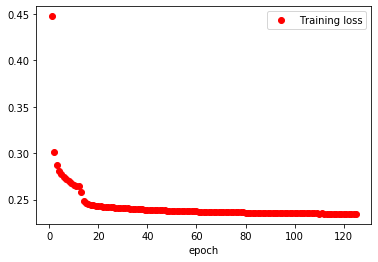

In [30]:
# To plot training loss only

loss = model_history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error', 'lr'])


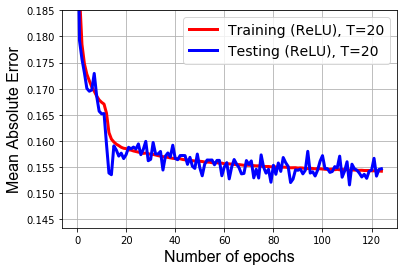

In [31]:
# list all data in history

print(model_history.history.keys())
hfont = {'fontname':'Arial'}
# summarize history for accuracy
acc = model_history.history['mean_absolute_error']
val_acc = model_history.history['val_mean_absolute_error']

plt.plot(acc,color='red',linewidth=3)
plt.plot(val_acc,color='blue',linewidth=3)
#plt.title('model accuracy')
plt.ylabel('Mean Absolute Error', fontsize=16, **hfont)
plt.xlabel('Number of epochs', fontsize=16, **hfont)

#ylim(top=0.2)  # adjust the top leaving bottom unchanged
#ylim(bottom=0.05)  # adjust the bottom leaving top unchanged
plt.legend(['Training (ReLU), T=20', 'Testing (ReLU), T=20'], loc='upper right', prop={"size":14})
plt.ylim(top=0.185)  # adjust the top leaving bottom unchanged
plt.grid()
plt.savefig('accuracy_3_layer.pdf')
plt.show()

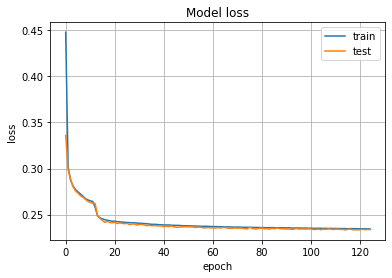

In [32]:
# summarize history for loss

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('loss_3_layer.pdf')
plt.grid()
plt.show()





In [33]:
# Making the predictions for testing

# Predicting the Test set results
y_pred = model.predict(x_test) 
y_pred

array([[9.9998915e-01, 1.0753572e-03, 1.8831310e-01, ..., 1.0823968e-01,
        7.0273876e-04, 0.0000000e+00],
       [1.9615889e-04, 5.5059385e-01, 4.8154891e-03, ..., 2.5307834e-03,
        1.3163686e-04, 0.0000000e+00],
       [9.9999982e-01, 5.9792399e-04, 4.3387809e-01, ..., 3.7167925e-01,
        7.5456500e-04, 0.0000000e+00],
       ...,
       [2.9802322e-08, 1.2235972e-01, 8.5065067e-02, ..., 2.4059284e-01,
        2.1394366e-01, 2.0861626e-07],
       [9.9998510e-01, 2.2312894e-01, 2.5074539e-01, ..., 2.7260184e-04,
        1.4731288e-03, 0.0000000e+00],
       [9.9999970e-01, 5.6949258e-04, 3.0394292e-01, ..., 6.1090589e-02,
        2.5591099e-01, 0.0000000e+00]], dtype=float32)

In [34]:
y_test.shape


(19362, 48)

In [35]:
y_pred.shape

(19362, 48)

In [36]:
# Evaluating the model # Test error

# Measure MSE error  
mse_test = metrics.mean_squared_error(y_test, y_pred)
print("Test Mean Squared error (MSE): {}".format(mse_test))

# Measure RMSE error 
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Test Root mean squared error (RMSE): {}".format(rmse_test))

# Measure MAE error
mae_test = metrics.mean_absolute_error(y_test, y_pred)
print("Test Mean absolute error (MAE): {}".format(mae_test))

Test Mean Squared error (MSE): 0.07700937705587814
Test Root mean squared error (RMSE): 0.27750563427771724
Test Mean absolute error (MAE): 0.1544111897995147


In [37]:
# Making the predictions for training

# Predicting the Training set results
y_pred_train = model.predict(x_train) 
y_pred_train

array([[2.6822090e-07, 1.5092066e-01, 5.7379127e-02, ..., 7.0572793e-03,
        2.1443883e-01, 0.0000000e+00],
       [1.1920929e-07, 2.5063753e-05, 4.1019917e-03, ..., 6.7204237e-05,
        8.2790852e-05, 0.0000000e+00],
       [9.9999857e-01, 4.2080879e-05, 9.2685223e-06, ..., 8.7052584e-04,
        2.4765730e-04, 0.0000000e+00],
       ...,
       [9.9999940e-01, 4.8965931e-02, 2.5099516e-04, ..., 5.8192015e-04,
        9.7692013e-05, 0.0000000e+00],
       [9.9999988e-01, 2.0370781e-03, 4.5782021e-01, ..., 4.7924945e-01,
        3.5756826e-04, 0.0000000e+00],
       [1.4990568e-05, 3.7323934e-01, 1.6018748e-04, ..., 6.8194830e-01,
        2.9253960e-04, 0.0000000e+00]], dtype=float32)

In [38]:
y_pred_train.shape 

(174257, 48)

In [39]:
# Evaluating the model # Training error

# Measure MSE error  
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
print("Training Mean Squared error (MSE): {}".format(mse_train))

# Measure RMSE error 
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print("Training Root mean squared error (RMSE): {}".format(rmse_train))

# Measure MAE error
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
print("Training Mean absolute error (MAE): {}".format(mae_train))

Training Mean Squared error (MSE): 0.07652950759060735
Training Root mean squared error (RMSE): 0.27663967103545967
Training Mean absolute error (MAE): 0.15408638603385308


In [40]:
y_pred_flat = y_pred.flatten()
y_pred_flat

array([0.99998915, 0.00107536, 0.1883131 , ..., 0.06109059, 0.255911  ,
       0.        ], dtype=float32)

In [41]:
y_test_flat = y_test.flatten()
y_test_flat

array([ 1., -0., -0., ..., -0.,  1.,  0.])

In [42]:
# Regression score for test

r2_score_test = metrics.r2_score(y_test_flat, y_pred_flat)
print("R2 Score Test: {}".format(r2_score_test))

R2 Score Test: 0.4859520064663644


In [43]:
y_pred_train_flat = y_pred_train.flatten()
y_pred_train_flat

array([2.6822090e-07, 1.5092066e-01, 5.7379127e-02, ..., 6.8194830e-01,
       2.9253960e-04, 0.0000000e+00], dtype=float32)

In [44]:
y_train_flat = y_train.flatten()
y_train_flat

array([ 0.,  0.,  0., ..., -0.,  0.,  0.])

In [45]:
# Regression score for training

r2_score_train = metrics.r2_score(y_train_flat, y_pred_train_flat)
print("R2 Score Train: {}".format(r2_score_train))

R2 Score Train: 0.48920650164844215


In [46]:
######################### Constraint verification for test data ##########################

In [47]:
y_pred = model.predict(x_test)
y_pred

array([[9.9998915e-01, 1.0753572e-03, 1.8831310e-01, ..., 1.0823968e-01,
        7.0273876e-04, 0.0000000e+00],
       [1.9615889e-04, 5.5059385e-01, 4.8154891e-03, ..., 2.5307834e-03,
        1.3163686e-04, 0.0000000e+00],
       [9.9999982e-01, 5.9792399e-04, 4.3387809e-01, ..., 3.7167925e-01,
        7.5456500e-04, 0.0000000e+00],
       ...,
       [2.9802322e-08, 1.2235972e-01, 8.5065067e-02, ..., 2.4059284e-01,
        2.1394366e-01, 2.0861626e-07],
       [9.9998510e-01, 2.2312894e-01, 2.5074539e-01, ..., 2.7260184e-04,
        1.4731288e-03, 0.0000000e+00],
       [9.9999970e-01, 5.6949258e-04, 3.0394292e-01, ..., 6.1090589e-02,
        2.5591099e-01, 0.0000000e+00]], dtype=float32)

In [48]:
x_test

array([[ 0.84120747, -0.44126682,  0.9782966 , ...,  0.07901042,
         0.33098094,  0.40812796],
       [-0.22813583,  1.58224603, -1.02218489, ..., -1.55020281,
        -0.8943241 , -0.35519562],
       [-1.59644805,  0.70660328,  0.9782966 , ...,  0.55921964,
        -1.49202966,  1.71821713],
       ...,
       [ 0.96791522, -1.57697218, -1.02218489, ...,  0.44613756,
        -0.39632253,  0.88680772],
       [ 0.70901927,  1.06957309,  0.9782966 , ..., -0.91656216,
         0.18514009, -0.50453401],
       [-0.60508044,  0.95669298,  0.9782966 , ...,  0.6007812 ,
         0.83174727, -0.49604493]])

In [49]:
x_test.shape

(19362, 75)

In [50]:
y_test.shape

(19362, 48)

In [51]:
y_pred

array([[9.9998915e-01, 1.0753572e-03, 1.8831310e-01, ..., 1.0823968e-01,
        7.0273876e-04, 0.0000000e+00],
       [1.9615889e-04, 5.5059385e-01, 4.8154891e-03, ..., 2.5307834e-03,
        1.3163686e-04, 0.0000000e+00],
       [9.9999982e-01, 5.9792399e-04, 4.3387809e-01, ..., 3.7167925e-01,
        7.5456500e-04, 0.0000000e+00],
       ...,
       [2.9802322e-08, 1.2235972e-01, 8.5065067e-02, ..., 2.4059284e-01,
        2.1394366e-01, 2.0861626e-07],
       [9.9998510e-01, 2.2312894e-01, 2.5074539e-01, ..., 2.7260184e-04,
        1.4731288e-03, 0.0000000e+00],
       [9.9999970e-01, 5.6949258e-04, 3.0394292e-01, ..., 6.1090589e-02,
        2.5591099e-01, 0.0000000e+00]], dtype=float32)

In [52]:
#round-off the y_pred

import numpy as np
a_list = np.array(y_pred)
y_pred_binary = np.round(a_list)
print(y_pred_binary)



[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [53]:
y_pred_binary.shape

(19362, 48)

In [54]:
y_pred_binary

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
y_test

array([[ 1., -0., -0., ...,  0.,  0.,  0.],
       [ 0., -0., -0., ..., -0., -0.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  1.,  1., ..., -0., -0.,  0.],
       [ 1.,  0., -0., ...,  0.,  0.,  0.],
       [ 1., -0.,  1., ..., -0.,  1.,  0.]])

In [56]:
len(y_pred_binary)

19362

In [57]:
inputs.shape

(193619, 75)

In [58]:
x_test

array([[ 0.84120747, -0.44126682,  0.9782966 , ...,  0.07901042,
         0.33098094,  0.40812796],
       [-0.22813583,  1.58224603, -1.02218489, ..., -1.55020281,
        -0.8943241 , -0.35519562],
       [-1.59644805,  0.70660328,  0.9782966 , ...,  0.55921964,
        -1.49202966,  1.71821713],
       ...,
       [ 0.96791522, -1.57697218, -1.02218489, ...,  0.44613756,
        -0.39632253,  0.88680772],
       [ 0.70901927,  1.06957309,  0.9782966 , ..., -0.91656216,
         0.18514009, -0.50453401],
       [-0.60508044,  0.95669298,  0.9782966 , ...,  0.6007812 ,
         0.83174727, -0.49604493]])

In [59]:
x_p = pd.DataFrame(x_test)
#pi = x_p.iloc[:, 27:50]
#pi
x_p.head

<bound method NDFrame.head of              0         1         2         3         4         5         6   \
0      0.841207 -0.441267  0.978297 -1.023818 -1.020742 -1.020754  0.444335   
1     -0.228136  1.582246 -1.022185 -1.023818 -1.020742 -1.020754 -0.446897   
2     -1.596448  0.706603  0.978297 -1.023818 -1.020742  0.979668 -0.446897   
3      0.909384  1.339170  0.978297  0.976736 -1.020742 -1.020754 -0.446897   
4      0.963092  0.757016  0.978297 -1.023818  0.979679 -1.020754 -1.338129   
...         ...       ...       ...       ...       ...       ...       ...   
19357 -0.330510 -1.674224 -1.022185 -1.023818  0.979679  0.979668 -0.446897   
19358  0.778950  1.205687 -1.022185 -1.023818  0.979679 -1.020754  0.444335   
19359  0.967915 -1.576972 -1.022185  0.976736 -1.020742 -1.020754  1.335567   
19360  0.709019  1.069573  0.978297  0.976736  0.979679  0.979668 -0.446897   
19361 -0.605080  0.956693  0.978297  0.976736 -1.020742 -1.020754  0.444335   

             7       

In [60]:
#In the next cells, we are going to compute the suboptimality of the DNN solution vs others 

In [61]:
x_pi = pd.DataFrame(x_test)
x_pi = x_pi.iloc[:, 19:31]
x_pi #Saving the energy prize

,19,20,21,22,23,24,25,26,27,28,29,30
0,0.797424,1.624837,1.408079,-0.705660,1.616163,0.105408,-1.314863,-0.213379,1.194943,0.309817,1.370577,0.695563
1,0.910248,-1.324470,0.972869,1.258758,-1.473333,-0.616448,-0.003166,-0.262597,-0.610148,-0.461709,1.331932,0.443176
2,0.678214,1.111967,-1.010459,0.009737,0.178206,-0.099478,1.643045,-0.832653,-0.001646,0.558960,1.513044,1.515312
3,1.009185,0.503984,0.891488,-1.280884,0.381883,-0.674822,-1.309120,1.442949,0.922354,-0.394573,-1.353021,0.667208
4,1.231449,-1.507154,0.553851,1.499620,-1.669532,0.819872,-0.231033,-0.800033,0.995345,1.384765,0.414492,-0.123149
...,...,...,...,...,...,...,...,...,...,...,...,...
19357,0.823504,0.169564,0.522083,1.263679,0.883790,0.062629,0.882360,0.612090,-0.956307,-0.601101,0.332818,1.587773
19358,-1.257069,-1.707736,1.614223,-1.520823,-0.057309,-1.331297,0.971741,-1.105858,-0.006269,1.003390,-0.190829,-1.079945
19359,-0.247845,-0.240955,0.539159,-0.070115,-1.051024,-1.164839,-1.547933,-0.253239,-1.214336,1.023754,-0.691713,-1.217684
19360,1.402320,-1.474820,-1.338674,-0.968397,-1.354419,-0.734736,0.407741,-0.562029,0.641753,0.048972,-0.141879,1.615398


In [62]:
#saving the test and predicted switching
y_test= pd.DataFrame(y_test)
y_train= pd.DataFrame(y_train)
y_pred= pd.DataFrame(y_pred)
y_pred


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,9.999892e-01,0.001075,0.188313,0.516241,0.000179,0.002838,0.474394,0.204195,0.001322,0.104158,...,0.385565,0.685749,0.000053,0.000697,0.779461,0.168245,0.000765,0.108240,0.000703,0.000000e+00
1,1.961589e-04,0.550594,0.004815,0.000383,0.461167,0.181265,0.001244,0.015498,0.543299,0.001929,...,0.001438,0.000203,0.794515,0.127899,0.000745,0.002833,0.463075,0.002531,0.000132,0.000000e+00
2,9.999998e-01,0.000598,0.433878,0.223845,0.127910,0.310105,0.001759,0.274163,0.104468,0.144586,...,0.360882,0.252009,0.087537,0.492812,0.000918,0.510433,0.159910,0.371679,0.000755,0.000000e+00
3,9.999982e-01,0.000065,0.000035,0.368476,0.000125,0.001797,0.725934,0.000180,0.000475,0.005775,...,0.000013,0.414567,0.000038,0.000495,0.670986,0.000036,0.000255,0.005796,0.400359,0.000000e+00
4,9.999944e-01,0.067530,0.000282,0.000007,0.824709,0.000362,0.002351,0.594385,0.000733,0.000136,...,0.000054,0.000006,0.785791,0.000034,0.001268,0.397283,0.000159,0.000036,0.001199,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,1.186132e-05,0.211546,0.237516,0.004013,0.203331,0.365588,0.000652,0.087878,0.539257,0.025982,...,0.181510,0.001079,0.185825,0.571367,0.000251,0.117194,0.588657,0.063771,0.000435,0.000000e+00
19358,6.109476e-06,0.313960,0.000121,0.353713,0.000333,0.537215,0.000321,0.444644,0.000351,0.000050,...,0.000016,0.394385,0.000088,0.250565,0.000090,0.216519,0.000157,0.000012,0.001280,0.000000e+00
19359,2.980232e-08,0.122360,0.085065,0.264344,0.243237,0.201891,0.249877,0.200541,0.208571,0.172490,...,0.268515,0.295265,0.278879,0.235084,0.241844,0.303638,0.253431,0.240593,0.213944,2.086163e-07
19360,9.999851e-01,0.223129,0.250745,0.001850,0.571361,0.259995,0.000564,0.465280,0.000219,0.000591,...,0.087284,0.001850,0.197502,0.121263,0.000435,0.346236,0.000092,0.000273,0.001473,0.000000e+00


In [63]:
'''
x_p = pd.DataFrame(inputs.values)            #Energy price of inputs
x_p = x_p.iloc[65544:81881, 18:50]            # Saving the Energy price
x_p.index = range(len(x_p))
x_p.columns = range(x_p.shape[1])


y_test= pd.DataFrame(y_test)
y_test = y_test.iloc[0:16377, 0:14]
y_test.index = range(len(y_test))
y_test.columns = range(y_test.shape[1])

y_pred= pd.DataFrame(y_pred_binary)
y_pred = y_pred.iloc[0:16377, 0:14]
y_pred.index = range(len(y_pred))
y_pred.columns = range(y_pred.shape[1])
'''
#testing = pd.concat([x_pi, y_test, y_pred], axis=1)
#testing.to_excel('testing.xlsx', index = False)

'\nx_p = pd.DataFrame(inputs.values)            #Energy price of inputs\nx_p = x_p.iloc[65544:81881, 18:50]            # Saving the Energy price\nx_p.index = range(len(x_p))\nx_p.columns = range(x_p.shape[1])\n\n\ny_test= pd.DataFrame(y_test)\ny_test = y_test.iloc[0:16377, 0:14]\ny_test.index = range(len(y_test))\ny_test.columns = range(y_test.shape[1])\n\ny_pred= pd.DataFrame(y_pred_binary)\ny_pred = y_pred.iloc[0:16377, 0:14]\ny_pred.index = range(len(y_pred))\ny_pred.columns = range(y_pred.shape[1])\n'

In [64]:
concat_x_pi =  pd.concat([x_pi, x_pi, x_pi, x_pi], ignore_index=True, axis=1)
concat_x_pi= pd.DataFrame(concat_x_pi)
#concat_x_pi.index = new_index
concat_x_pi = concat_x_pi.T


In [65]:
concat_x_pi = abs(concat_x_pi)
concat_x_pi.shape

(48, 19362)

In [66]:
y_pred.shape


(19362, 48)

In [67]:
y_pred = y_pred

In [68]:
y_pred

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,9.999892e-01,0.001075,0.188313,0.516241,0.000179,0.002838,0.474394,0.204195,0.001322,0.104158,...,0.385565,0.685749,0.000053,0.000697,0.779461,0.168245,0.000765,0.108240,0.000703,0.000000e+00
1,1.961589e-04,0.550594,0.004815,0.000383,0.461167,0.181265,0.001244,0.015498,0.543299,0.001929,...,0.001438,0.000203,0.794515,0.127899,0.000745,0.002833,0.463075,0.002531,0.000132,0.000000e+00
2,9.999998e-01,0.000598,0.433878,0.223845,0.127910,0.310105,0.001759,0.274163,0.104468,0.144586,...,0.360882,0.252009,0.087537,0.492812,0.000918,0.510433,0.159910,0.371679,0.000755,0.000000e+00
3,9.999982e-01,0.000065,0.000035,0.368476,0.000125,0.001797,0.725934,0.000180,0.000475,0.005775,...,0.000013,0.414567,0.000038,0.000495,0.670986,0.000036,0.000255,0.005796,0.400359,0.000000e+00
4,9.999944e-01,0.067530,0.000282,0.000007,0.824709,0.000362,0.002351,0.594385,0.000733,0.000136,...,0.000054,0.000006,0.785791,0.000034,0.001268,0.397283,0.000159,0.000036,0.001199,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,1.186132e-05,0.211546,0.237516,0.004013,0.203331,0.365588,0.000652,0.087878,0.539257,0.025982,...,0.181510,0.001079,0.185825,0.571367,0.000251,0.117194,0.588657,0.063771,0.000435,0.000000e+00
19358,6.109476e-06,0.313960,0.000121,0.353713,0.000333,0.537215,0.000321,0.444644,0.000351,0.000050,...,0.000016,0.394385,0.000088,0.250565,0.000090,0.216519,0.000157,0.000012,0.001280,0.000000e+00
19359,2.980232e-08,0.122360,0.085065,0.264344,0.243237,0.201891,0.249877,0.200541,0.208571,0.172490,...,0.268515,0.295265,0.278879,0.235084,0.241844,0.303638,0.253431,0.240593,0.213944,2.086163e-07
19360,9.999851e-01,0.223129,0.250745,0.001850,0.571361,0.259995,0.000564,0.465280,0.000219,0.000591,...,0.087284,0.001850,0.197502,0.121263,0.000435,0.346236,0.000092,0.000273,0.001473,0.000000e+00


In [69]:
result_predict = y_pred.dot(concat_x_pi);
result_predict.shape

(19362, 19362)

In [70]:
result_test = y_test.dot(concat_x_pi);
result_test.shape

(19362, 19362)

In [71]:
sub = abs(result_test - result_predict)


In [72]:
sub

,0,1,2,3,4,5,6,7,8,9,...,19352,19353,19354,19355,19356,19357,19358,19359,19360,19361
0,0.066973,0.487886,0.263920,0.042783,0.789300,0.053795,0.019421,0.638210,0.181825,0.067521,...,0.745897,0.242513,0.037534,0.395560,0.196382,0.345858,0.394911,0.158644,0.063014,0.268915
1,1.272909,1.304441,0.475292,0.601064,1.531763,1.395771,1.569041,1.224006,1.642795,1.208214,...,1.421441,0.675740,0.675950,1.068968,0.771853,0.433809,1.156760,1.007441,1.357839,1.263485
2,0.603041,0.242418,1.023399,0.605742,0.211595,0.062376,0.560223,0.043408,0.578898,0.093933,...,0.533441,0.115090,1.045781,0.539704,0.858709,0.216594,0.514242,0.157869,0.617419,1.070753
3,1.356812,0.328649,2.168980,0.983656,0.585229,0.300289,0.592392,0.341222,0.130640,1.143972,...,0.416955,0.161472,0.093268,0.472580,0.375008,0.207296,0.077366,1.736055,0.147747,0.143386
4,0.841096,0.739238,0.346602,0.372590,0.888613,0.466571,0.839601,0.617125,0.823682,0.415317,...,0.472529,0.225281,0.531409,0.748881,0.463386,0.390227,0.427151,0.427154,0.755179,0.797845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,1.131068,0.901844,0.512272,0.335891,1.172503,0.166888,0.443934,0.595864,0.837790,0.093089,...,0.759203,0.575962,0.221278,0.764409,0.129170,0.524057,0.706646,1.095503,0.515855,0.290108
19358,0.358880,0.801409,0.247611,0.442224,0.821158,0.708122,0.595750,0.786845,0.396517,0.284932,...,1.371069,0.827320,0.137578,0.862616,0.060049,0.544975,0.871009,0.261818,0.569744,0.457713
19359,1.141981,0.179982,1.230555,0.264565,0.071453,0.703204,0.543082,0.130405,0.954999,1.017067,...,0.221125,1.060654,0.293468,0.476597,0.313362,0.670562,0.392153,0.788289,0.648959,0.028911
19360,0.043769,0.390291,1.513108,1.105477,0.480065,1.586159,0.148410,0.575204,0.513746,1.211341,...,0.712718,0.779762,1.419385,0.694908,0.120464,0.266302,2.226033,0.905019,0.198935,0.202964


In [73]:
sub = abs(result_test - result_predict)/(result_test)
sub

,0,1,2,3,4,5,6,7,8,9,...,19352,19353,19354,19355,19356,19357,19358,19359,19360,19361
0,0.008614,0.104411,0.035331,0.004351,0.125731,0.006646,0.002732,0.076411,0.031750,0.010598,...,0.081005,0.032843,0.006426,0.056715,0.042070,0.048493,0.039753,0.027238,0.009750,0.041272
1,0.120160,0.146473,0.166109,0.128621,0.141392,0.161536,0.163559,0.159909,0.154212,0.213644,...,0.167004,0.233934,0.106818,0.127327,0.164895,0.087360,0.234578,0.139371,0.150351,0.139694
2,0.106969,0.036622,0.257859,0.072979,0.022664,0.005220,0.090684,0.005734,0.056510,0.014686,...,0.048596,0.014988,0.166805,0.084277,0.100178,0.037816,0.049317,0.026640,0.078813,0.124066
3,0.151930,0.074290,0.229488,0.099472,0.110397,0.038477,0.094787,0.043030,0.026004,0.171340,...,0.043144,0.031239,0.023530,0.092015,0.078130,0.030606,0.009536,0.233051,0.026641,0.039831
4,0.122429,0.109263,0.097460,0.061586,0.097956,0.075305,0.129212,0.116631,0.086137,0.130546,...,0.103006,0.061845,0.097016,0.098323,0.058340,0.070661,0.087213,0.102799,0.094492,0.095086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19357,0.151988,0.131972,0.113491,0.041720,0.130942,0.012330,0.062457,0.083616,0.077189,0.012768,...,0.069828,0.096317,0.031659,0.128943,0.017327,0.105050,0.073478,0.174238,0.057746,0.037083
19358,0.084288,0.128272,0.087148,0.064393,0.100415,0.071435,0.081408,0.101986,0.053965,0.042326,...,0.148940,0.102977,0.026503,0.146086,0.010594,0.127995,0.089107,0.081514,0.083230,0.066965
19359,0.098614,0.019371,0.140802,0.028183,0.006429,0.056250,0.052809,0.012977,0.085487,0.112860,...,0.017560,0.175020,0.032931,0.062390,0.037298,0.111467,0.035802,0.095949,0.067726,0.002929
19360,0.005237,0.043657,0.362022,0.151432,0.041549,0.162544,0.021478,0.084562,0.040189,0.278050,...,0.083109,0.208610,0.298788,0.077864,0.012261,0.040226,0.291466,0.162699,0.018136,0.024882


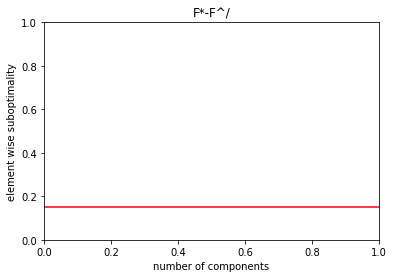

In [74]:
suboptimality = np.diag(sub)
#plt.plot(suboptimality[48:72])
plt.xlabel('number of components')
plt.ylabel('element wise suboptimality')
plt.title('F*-F^/')
plt.axhline(y=0.15, color='r', linestyle='-')

In [75]:
suboptimality.shape

(19362,)

In [76]:
#Calculating the suboptimality for T=20, two tank model, batch normalization, activation = sigmoid, ReLU
#loss= binary cross entropy, pumps =4 
T = np.mean(suboptimality)
T

0.07001520354089254